## Importing data and dropping unnecessary columns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from darts.models import RegressionModel
from darts import TimeSeries
from darts.models.forecasting.baselines import NaiveDrift

data = pd.read_csv("../raw_data/Historical_Emissions.csv")
pd.set_option('display.max_columns', None)
data.head()


,TCUID,Company,ISIN,Financial Year,GICS Sector Code,GICS Sector Name,GICS Industry Group Code,GICS Industry Group Name,GICS Industry Code,GICS Industry Name,GICS Sub Industry Code,GICS Sub Industry Name,GICS Description,Trucost Sector Name,Trucost Sector,Country,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon Disclosure,Carbon-Weighted Disclosure (%),Revenue (USD mn),Currency Code,Accounting Year End,FigureRestate,EffectiveDate
0,42694,Erste Group Bank AG,AT0000652011,2005,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,7596.054435,6814.325028,164017.684486,7596.054435,31981.789915,39577.844350,1.347260,1.208610,29.090685,1.347260,5.672389,7.019649,0.249891,5.620073,5.869964,0.004432,0.099679,0.104111,Estimated data,0.000000,5638.151346,EUR,2005-12-31 00:00:00.0,0,2009-05-15 12:48:46.67
1,42694,Erste Group Bank AG,AT0000652011,2006,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,12552.501135,10906.081210,258799.303026,12552.501135,52125.089787,64677.590922,1.308070,1.136500,26.968945,1.308070,5.431849,6.739919,0.421204,9.050295,9.471499,0.004389,0.094311,0.098701,Estimated data,0.000000,9596.196598,EUR,2006-12-31 00:00:00.0,0,2009-05-15 12:48:46.67
2,42694,Erste Group Bank AG,AT0000652011,2007,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,11476.177472,9656.932392,232394.411879,11476.177472,47397.574615,58873.752087,1.270021,1.068693,25.718129,1.270021,5.245294,6.515315,0.392789,8.284776,8.677566,0.004347,0.091684,0.096031,Estimated data,0.000000,9036.210000,EUR,2007-12-31 00:00:00.0,0,2009-05-15 12:48:46.67
3,42694,Erste Group Bank AG,AT0000652011,2008,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,11104.953114,19302.583214,238060.077199,11104.953114,59544.335750,70649.288864,1.139229,1.980203,24.421979,1.139229,6.108502,7.247731,0.387685,8.985015,9.372700,0.003977,0.092175,0.096152,Estimated data,0.000000,9747.780000,EUR,2008-12-31 00:00:00.0,0,2009-09-04 10:12:13.25
4,42694,Erste Group Bank AG,AT0000652011,2009,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,28018.732600,65432.344312,302681.312761,28018.732600,114091.239716,142109.972316,2.403201,5.612213,25.961351,2.403201,9.785747,12.188948,0.997726,13.108528,14.106254,0.008558,0.112433,0.120991,Value derived from data provided in Annual Rep...,94.431432,11658.920000,EUR,2009-12-31 00:00:00.0,0,2014-10-31 07:48:17.57


In [31]:
to_drop = ['ISIN','GICS Sector Code','GICS Industry Group Code','GICS Industry Code', 'GICS Sub Industry Code', \
          'GICS Description', 'Carbon-Scope 3 (tonnes CO2e)', 'Trucost Sector Name', 'Trucost Sector', 'Country','Carbon-Direct (tonnes CO2e)', 'Carbon-First Tier Indirect (tonnes CO2e)', 'Carbon-Direct+First Tier Indirect (tonnes CO2e)', 'Carbon Intensity-Scope 3 (tonnes CO2e/USD mn)', 'Carbon Intensity-Direct (tonnes CO2e/USD mn)', 'Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn)', 'Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn)', 'GHG-Direct (USD mn)', 'GHG-Indirect (USD mn)', 'GHG-Total (USD mn)', 'GHG-Direct Impact Ratio (%)', 'GHG-Indirect Impact Ratio (%)', 'GHG-Total Impact Ratio (%)', 'Carbon Disclosure','Currency Code','Accounting Year End','FigureRestate', 'EffectiveDate']
data_d = data.copy().drop(columns=to_drop)
data_d.head()

,TCUID,Company,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon-Weighted Disclosure (%),Revenue (USD mn)
0,42694,Erste Group Bank AG,2005,Financials,Banks,Banks,Diversified Banks,7596.054435,6814.325028,1.347260,1.208610,0.000000,5638.151346
1,42694,Erste Group Bank AG,2006,Financials,Banks,Banks,Diversified Banks,12552.501135,10906.081210,1.308070,1.136500,0.000000,9596.196598
2,42694,Erste Group Bank AG,2007,Financials,Banks,Banks,Diversified Banks,11476.177472,9656.932392,1.270021,1.068693,0.000000,9036.210000
3,42694,Erste Group Bank AG,2008,Financials,Banks,Banks,Diversified Banks,11104.953114,19302.583214,1.139229,1.980203,0.000000,9747.780000
4,42694,Erste Group Bank AG,2009,Financials,Banks,Banks,Diversified Banks,28018.732600,65432.344312,2.403201,5.612213,94.431432,11658.920000


In [35]:
data_d.to_csv("Historical_Emissions_simp.csv", index=False)

## Selecting companies which has data for 2017 - 2020

In [3]:
from_2017_2020 = data_d[(data_d["Financial Year"] == 2017) | (data_d["Financial Year"] == 2018) | (data_d["Financial Year"] == 2019) | (data_d["Financial Year"] == 2020)]
from_2017_2020.shape

(61299, 26)

In [4]:
id_2017_2020 = pd.DataFrame(from_2017_2020.TCUID.value_counts() == 4).reset_index()
valid_tcuid = id_2017_2020[id_2017_2020.TCUID == True].sort_values("index")
tucid_list = valid_tcuid["index"].to_list()
tucid_list

[42705,
 42722,
 42727,
 42733,
 42734,
 42737,
 42738,
 42741,
 42746,
 42749,
 42751,
 42754,
 42758,
 42762,
 42766,
 42773,
 42779,
 42786,
 42795,
 42797,
 42800,
 42809,
 42821,
 42824,
 42828,
 42832,
 42835,
 42837,
 42838,
 42843,
 42844,
 42850,
 42854,
 42863,
 42870,
 42872,
 42878,
 42884,
 42886,
 42892,
 42897,
 42909,
 42910,
 42913,
 42921,
 42922,
 42926,
 42927,
 42930,
 42934,
 42938,
 42947,
 42949,
 42964,
 42965,
 42968,
 42973,
 42985,
 42986,
 42997,
 42998,
 42999,
 43005,
 43006,
 43015,
 43019,
 43025,
 43029,
 43033,
 43034,
 43039,
 43049,
 43050,
 43051,
 43057,
 43058,
 43066,
 43068,
 43069,
 43074,
 43079,
 43080,
 43081,
 43090,
 43093,
 43094,
 43108,
 43109,
 43111,
 43113,
 43125,
 43126,
 43134,
 43136,
 43141,
 43143,
 43146,
 43151,
 43155,
 43157,
 43164,
 43168,
 43173,
 43174,
 43177,
 43180,
 43183,
 43185,
 43189,
 43193,
 43194,
 43195,
 43196,
 43197,
 43199,
 43201,
 43205,
 43206,
 43211,
 43220,
 43222,
 43225,
 43230,
 43234,
 43235,


In [5]:
data_4y_plus = data_d[data_d.TCUID.isin(tucid_list)]
data_4y_plus

,TCUID,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon-Weighted Disclosure (%),Revenue (USD mn)
119,42705,2005,Financials,Banks,Banks,Diversified Banks,23725.480000,263383.450000,425220.172526,23725.480000,313453.977546,337179.457546,1.557472,17.289952,27.913813,1.557472,20.576859,22.134331,0.780508,22.653669,23.434177,0.005124,0.148711,0.153835,100.000000,15233.324671
120,42705,2006,Financials,Banks,Banks,Diversified Banks,13054.644964,225579.860000,419084.751950,13054.644964,290573.973774,303628.618738,0.835932,14.444626,26.835385,0.835932,18.606414,19.442347,0.438054,21.632341,22.070395,0.002805,0.138519,0.141324,86.865480,15616.870940
121,42705,2007,Financials,Banks,Banks,Diversified Banks,21413.695610,218371.980000,511521.743127,21413.695610,297423.208981,318836.904592,1.066625,10.877195,25.479101,1.066625,14.814768,15.881393,0.732916,24.982166,25.715082,0.003651,0.124437,0.128088,90.005669,20076.130000
122,42705,2008,Financials,Banks,Banks,Diversified Banks,17869.900000,204469.350000,333234.023148,17869.900000,264365.406678,282235.306678,1.274404,14.581866,23.764803,1.274404,18.853393,20.127796,0.623857,18.772085,19.395942,0.004449,0.133874,0.138323,100.000000,14022.166271
123,42705,2009,Financials,Banks,Banks,Diversified Banks,17362.999888,196595.053433,396638.884402,17362.999888,268091.633134,285454.633022,1.107378,12.538445,25.296846,1.107378,17.098356,18.205733,0.618284,21.124975,21.743258,0.003943,0.134731,0.138674,100.000000,15679.381128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128086,239840,2016,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Life Sciences Tools & Services,Life Sciences Tools & Services,138.363081,206.825577,846.544521,138.363081,523.086614,661.449695,14.928056,22.314507,91.334078,14.928056,56.436056,71.364112,0.005101,0.038840,0.043941,0.055040,0.419044,0.474083,0.000000,9.268660
128087,239840,2017,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Life Sciences Tools & Services,Life Sciences Tools & Services,415.686161,664.035924,2637.807059,415.686161,1630.266574,2045.952735,15.120039,24.153436,95.946773,15.120039,59.298809,74.418848,0.015664,0.124423,0.140087,0.056974,0.452573,0.509547,0.000000,27.492400
128088,239840,2018,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Life Sciences Tools & Services,Life Sciences Tools & Services,477.895068,776.167546,3002.747587,477.895068,1885.262809,2363.157877,14.653002,23.798497,92.068883,14.653002,57.805072,72.458074,0.018448,0.145879,0.164326,0.056563,0.447286,0.503849,0.000000,32.614142
128089,239840,2019,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Life Sciences Tools & Services,Life Sciences Tools & Services,558.067639,853.884753,3408.417618,558.067639,2142.909992,2700.977630,14.124052,21.610843,86.263139,14.124052,54.234593,68.358644,0.021933,0.167521,0.189453,0.055509,0.423976,0.479485,0.000000,39.511866


Number of Industries:

In [6]:
ind_names = data_d["GICS Industry Name"].unique()
len(ind_names)

72

In [7]:
airline = data_4y_plus[data_4y_plus["GICS Industry Name"] == "Airlines"]
airline

,TCUID,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon-Weighted Disclosure (%),Revenue (USD mn)
2038,42922,2005,Industrials,Transportation,Airlines,Airlines,3.426008e+06,7886.144933,415560.419158,3.426008e+06,140029.556137,3.566038e+06,1443.702478,3.323182,175.115058,1443.702478,59.007746,1502.710225,112.706924,13.930502,126.637425,4.749413,0.587024,5.336437,0.000000,2373.070740
2039,42922,2006,Industrials,Transportation,Airlines,Airlines,3.071636e+06,9454.474059,438460.507612,3.071636e+06,141411.607524,3.213048e+06,1015.242776,3.124910,144.920777,1015.242776,46.739626,1061.982402,103.069963,15.030198,118.100161,3.406687,0.496781,3.903468,98.518512,3025.518615
2040,42922,2007,Industrials,Transportation,Airlines,Airlines,3.589693e+06,10777.592037,521681.433759,3.589693e+06,172159.289927,3.761852e+06,978.715302,2.938467,142.234343,978.715302,46.938537,1025.653840,122.862639,18.224484,141.087123,3.349800,0.496883,3.846684,98.489903,3667.760000
2041,42922,2008,Industrials,Transportation,Airlines,Airlines,4.366824e+06,11989.691632,486499.346347,4.366824e+06,166084.150489,4.532908e+06,1038.663612,2.851788,115.715479,1038.663612,39.503664,1078.167277,152.450358,17.403065,169.853423,3.626082,0.413938,4.040020,98.616447,4204.272001
2042,42922,2009,Industrials,Transportation,Airlines,Airlines,4.501776e+06,12064.885540,583991.930498,4.501776e+06,192722.281418,4.694498e+06,1055.478864,2.828713,136.921778,1055.478864,45.185346,1100.664210,160.304884,21.225457,181.530340,3.758482,0.497649,4.256130,99.928412,4265.150065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119857,236087,2020,Industrials,Transportation,Airlines,Airlines,1.616575e+06,3996.856000,191948.242000,1.616575e+06,59432.037000,1.676007e+06,1104.458000,2.731000,131.141000,1104.458011,40.604000,1145.062000,64.317000,7.796000,72.113000,4.394000,0.533000,4.927000,0.000000,1463.681986
123410,237444,2017,Industrials,Transportation,Airlines,Airlines,7.267930e+05,1945.822052,95183.004597,7.267930e+05,31731.708073,7.585247e+05,1174.709812,3.145017,153.843550,1174.709812,51.287713,1225.997525,27.386481,3.659981,31.046462,4.426456,0.591560,5.018015,0.000000,618.700000
123411,237444,2018,Industrials,Transportation,Airlines,Airlines,7.346331e+05,1980.951578,88145.433969,7.346331e+05,27895.878569,7.625290e+05,1149.185825,3.098800,137.885809,1149.185825,43.637493,1192.823318,28.358039,3.479069,31.837108,4.436045,0.544230,4.980275,0.000000,639.264000
123412,237444,2019,Industrials,Transportation,Airlines,Airlines,7.762799e+05,1921.458173,83509.401481,7.762799e+05,25620.020281,8.018999e+05,1136.850101,2.813946,122.298247,1136.850101,37.520130,1174.370231,30.508643,3.357571,33.866215,4.467944,0.491711,4.959656,0.000000,682.834000


<AxesSubplot:xlabel='Financial Year'>

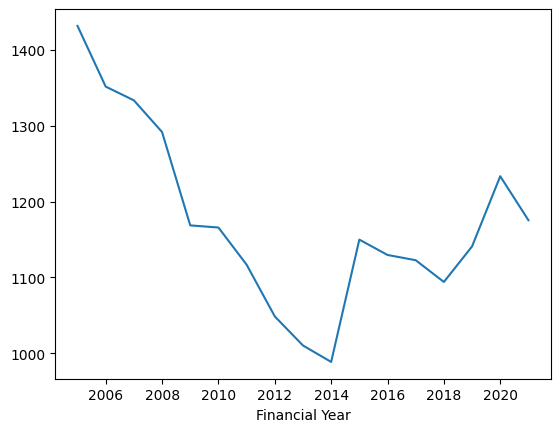

In [8]:
airline_by_yr = airline.groupby("Financial Year").mean()
airline_by_yr["C-int-1+2"] = airline_by_yr["Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)"] + airline_by_yr["Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)"]
airline_by_yr["C-int-1+2"].plot()

In [20]:
airline_by_yr

,TCUID,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon-Weighted Disclosure (%),Revenue (USD mn),C-int-1+2
Financial Year,,,,,,,,,,,,,,,,,,,,,,
2005,50638.052632,5.502921e+06,15503.937531,6.776641e+05,5.502921e+06,230247.770748,5.733169e+06,1427.969601,3.734383,173.721663,1427.969615,58.896393,1486.866008,181.032062,22.803775,203.835837,4.697656,0.583793,5.281449,10.520861,3905.622538,1431.703984
2006,51058.900000,5.880978e+06,15720.265279,6.093862e+05,5.880978e+06,198573.578389,6.079551e+06,1348.051172,3.605414,139.961451,1348.051185,45.371566,1393.422751,197.338544,20.976027,218.314570,4.523439,0.481752,5.005191,34.800505,4247.480429,1351.656586
2007,51401.315789,6.745135e+06,18362.148182,7.532423e+05,6.745136e+06,250954.406274,6.996090e+06,1330.299836,3.248360,141.472732,1330.299850,46.987650,1377.287500,230.862416,26.409724,257.272140,4.553151,0.495337,5.048489,47.211469,5332.341590,1333.548196
2008,51401.315789,7.272589e+06,20240.953404,6.726745e+05,7.272589e+06,232780.355898,7.505370e+06,1288.473173,3.251926,114.793023,1288.473193,39.576864,1328.050057,253.893622,24.190813,278.084436,4.498193,0.412114,4.910307,47.227928,5882.077764,1291.725099
2009,51346.500000,6.907876e+06,27500.990218,7.518076e+05,6.907877e+06,260001.747270,7.167878e+06,1164.154386,4.439057,133.563720,1164.154399,46.039288,1210.193687,245.984344,27.751014,273.735358,4.145467,0.491425,4.636892,49.845910,5551.516359,1168.593443
2010,64584.000000,7.898457e+06,42482.505912,8.635607e+05,7.898457e+06,302880.434318,8.201338e+06,1161.569907,4.204405,122.489433,1161.569922,41.114117,1202.684039,278.445605,31.941399,310.387003,4.094901,0.446643,4.541544,47.528364,7050.557460,1165.774312
2011,63382.652174,9.954775e+06,57630.824272,1.126740e+06,9.954776e+06,434295.566637,1.038907e+07,1112.832222,3.952252,116.356340,1112.832237,42.827057,1155.659294,356.552323,42.421535,398.973858,3.985855,0.430919,4.416774,56.495168,9666.122282,1116.784474
2012,63382.652174,1.053208e+07,60867.673758,1.201981e+06,1.053208e+07,418679.452862,1.095076e+07,1044.630232,3.901941,113.367004,1044.630253,37.238353,1081.868606,377.229724,45.232467,422.462191,3.741575,0.420032,4.161606,60.843085,10483.754677,1048.532173
2013,86848.290323,9.315720e+06,58118.408600,1.152389e+06,9.315720e+06,420314.968228,9.736035e+06,1006.162487,4.004037,111.506583,1006.162507,37.053876,1043.216383,333.663135,43.357694,377.020829,3.603794,0.413734,4.017528,54.817505,9791.117728,1010.166524


In [10]:
tmp = airline_by_yr["C-int-1+2"].reset_index()
tmp

,Financial Year,C-int-1+2
0,2005,1431.703984
1,2006,1351.656586
2,2007,1333.548196
3,2008,1291.725099
4,2009,1168.593443
5,2010,1165.774312
6,2011,1116.784474
7,2012,1048.532173
8,2013,1010.166524
9,2014,988.492899


In [11]:
series = TimeSeries.from_dataframe(tmp, "Financial Year", "C-int-1+2")
train, val = series[:-4], series[-4:]
train

<TimeSeries (DataArray) (Financial Year: 13, component: 1, sample: 1)>
array([[[1431.70398366]],

       [[1351.65658568]],

       [[1333.54819628]],

       [[1291.72509871]],

       [[1168.59344278]],

       [[1165.77431227]],

       [[1116.78447371]],

       [[1048.5321734 ]],

       [[1010.16652442]],

       [[ 988.49289854]],

       [[1149.80622995]],

       [[1129.59366285]],

       [[1122.64577027]]])
Coordinates:
  * Financial Year  (Financial Year) int64 2005 2006 2007 ... 2015 2016 2017
  * component       (component) object 'C-int-1+2'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [13]:
model = NaiveDrift()
model.fit(train)
pred = model.predict(len(val))
pred

<TimeSeries (DataArray) (Financial Year: 4, component: 1, sample: 1)>
array([[[1096.89091915]],

       [[1071.13606804]],

       [[1045.38121692]],

       [[1019.62636581]]])
Coordinates:
  * Financial Year  (Financial Year) int64 2018 2019 2020 2021
  * component       (component) object 'C-int-1+2'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [14]:
series

<TimeSeries (DataArray) (Financial Year: 17, component: 1, sample: 1)>
array([[[1431.70398366]],

       [[1351.65658568]],

       [[1333.54819628]],

       [[1291.72509871]],

       [[1168.59344278]],

       [[1165.77431227]],

       [[1116.78447371]],

       [[1048.5321734 ]],

       [[1010.16652442]],

       [[ 988.49289854]],

       [[1149.80622995]],

       [[1129.59366285]],

       [[1122.64577027]],

       [[1093.96100862]],

       [[1140.86716943]],

       [[1233.42938613]],

       [[1175.4166    ]]])
Coordinates:
  * Financial Year  (Financial Year) int64 2005 2006 2007 ... 2019 2020 2021
  * component       (component) object 'C-int-1+2'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

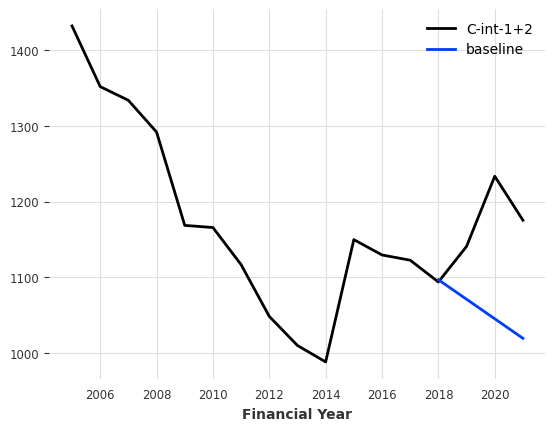

In [15]:
series.plot()
pred.plot(label="baseline", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [16]:
ind_names

array(['Banks', 'Diversified Telecommunication Services',
       'Containers & Packaging', 'Insurance',
       'Diversified Financial Services', 'Metals & Mining',
       'Food & Staples Retailing', 'Beverages', 'Capital Markets',
       'Building Products', 'Industrial Conglomerates',
       'Multiline Retail', 'Oil, Gas & Consumable Fuels', 'Chemicals',
       'Distributors', 'Pharmaceuticals', 'Leisure Products',
       'Health Care Technology',
       'Electronic Equipment, Instruments & Components',
       'Commercial Services & Supplies', 'Machinery',
       'Textiles, Apparel & Luxury Goods', 'Energy Equipment & Services',
       'Food Products', 'Professional Services', 'Construction Materials',
       'Independent Power and Renewable Electricity Producers',
       'Personal Products', 'Electric Utilities', 'Auto Components',
       'Air Freight & Logistics', 'Health Care Equipment & Supplies',
       'Health Care Providers & Services', 'Household Products',
       'Semiconduct

In [17]:
for industry in ind_names:
    df = data_4y_plus[data_4y_plus["GICS Industry Name"] == industry]
    df = df.groupby("Financial Year").mean()
    print(industry, df.shape)

Banks (17, 21)
Diversified Telecommunication Services (17, 21)
Containers & Packaging (17, 21)
Insurance (17, 21)
Diversified Financial Services (17, 21)
Metals & Mining (17, 21)
Food & Staples Retailing (17, 21)
Beverages (17, 21)
Capital Markets (17, 21)
Building Products (17, 21)
Industrial Conglomerates (17, 21)
Multiline Retail (17, 21)
Oil, Gas & Consumable Fuels (17, 21)
Chemicals (17, 21)
Distributors (17, 21)
Pharmaceuticals (17, 21)
Leisure Products (17, 21)
Health Care Technology (17, 21)
Electronic Equipment, Instruments & Components (17, 21)
Commercial Services & Supplies (17, 21)
Machinery (17, 21)
Textiles, Apparel & Luxury Goods (17, 21)
Energy Equipment & Services (17, 21)
Food Products (17, 21)
Professional Services (17, 21)
Construction Materials (17, 21)
Independent Power and Renewable Electricity Producers (16, 21)
Personal Products (17, 21)
Electric Utilities (17, 21)
Auto Components (17, 21)
Air Freight & Logistics (17, 21)
Health Care Equipment & Supplies (17, 2

In [18]:
ind_names_17yr = ind_names.tolist()
ind_names_17yr.remove("Entertainment")
ind_names_17yr.remove("Media (discont. 2018)")
ind_names_17yr.remove("Media")
ind_names_17yr.remove("Internet Software & Services (discont.  2018)")
ind_names_17yr.remove("Interactive Media & Services")
ind_names_17yr.remove(np.nan)
ind_names_17yr = sorted(ind_names_17yr)

/home/leo/.pyenv/versions/3.8.12/envs/carbon-forecast/lib/python3.8/site-packages/darts/timeseries.py:3052: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


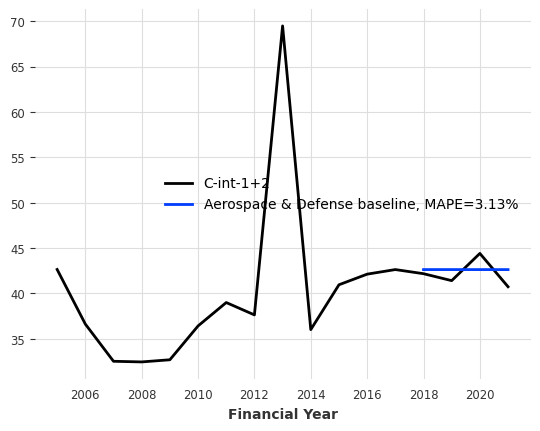

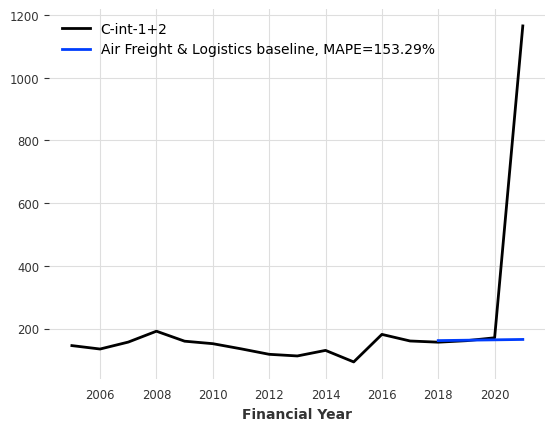

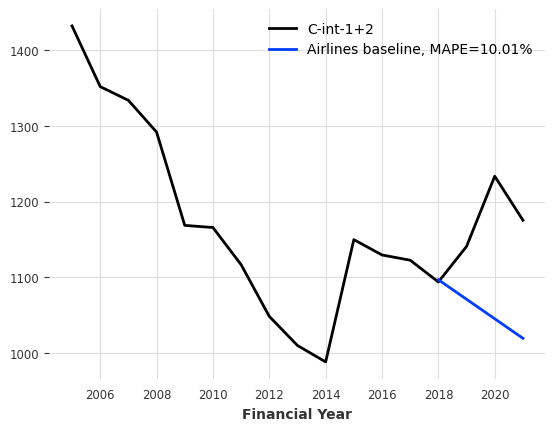

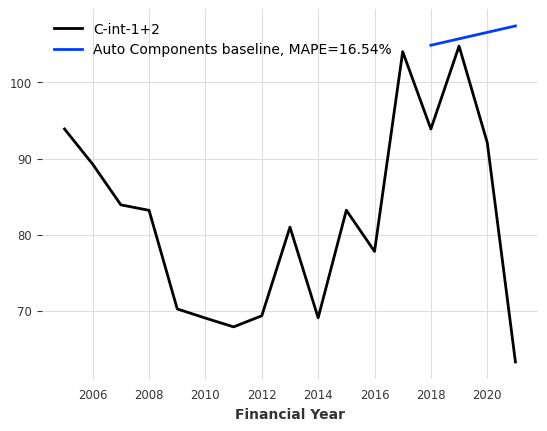

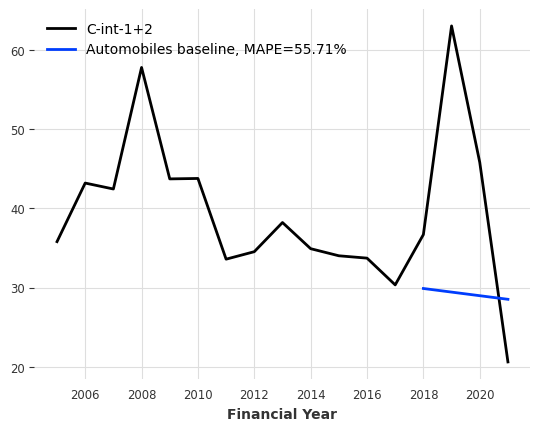

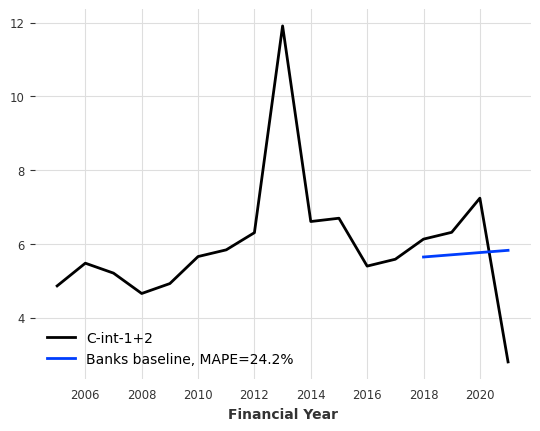

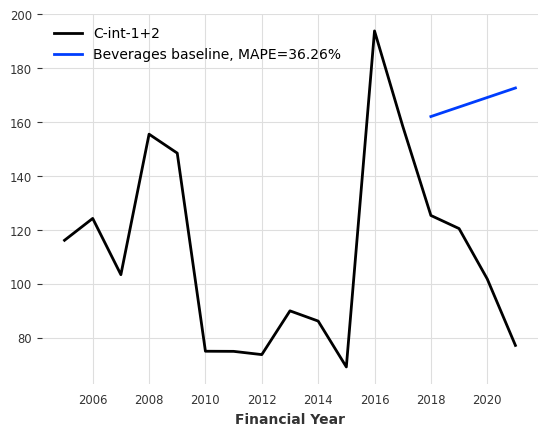

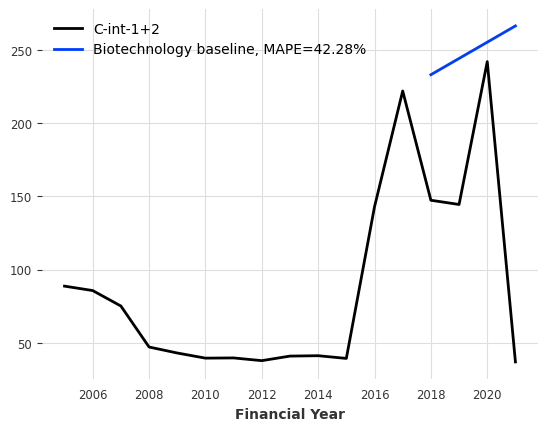

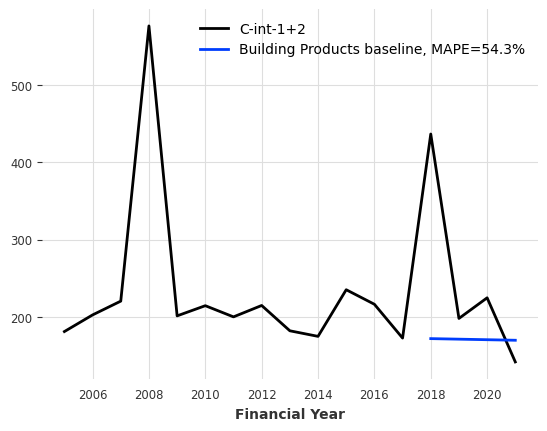

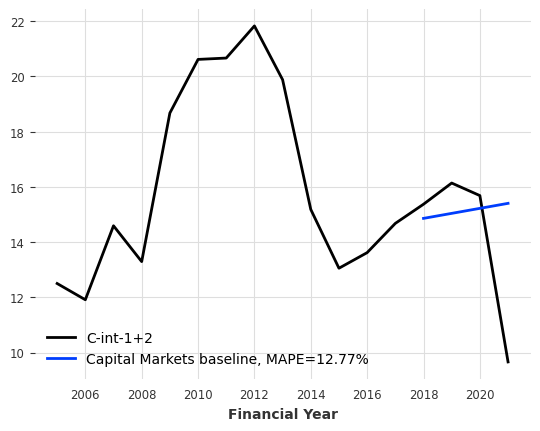

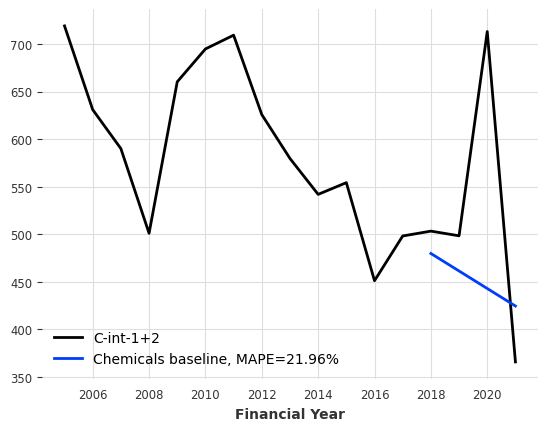

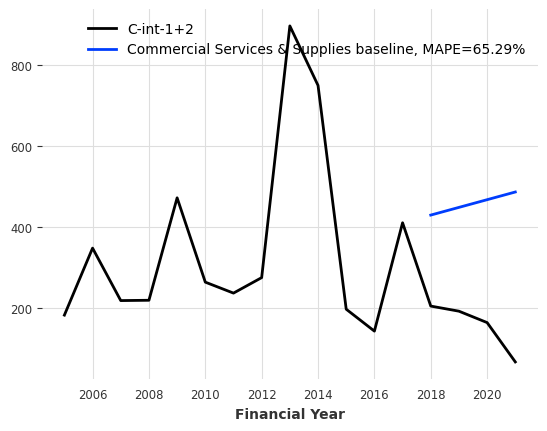

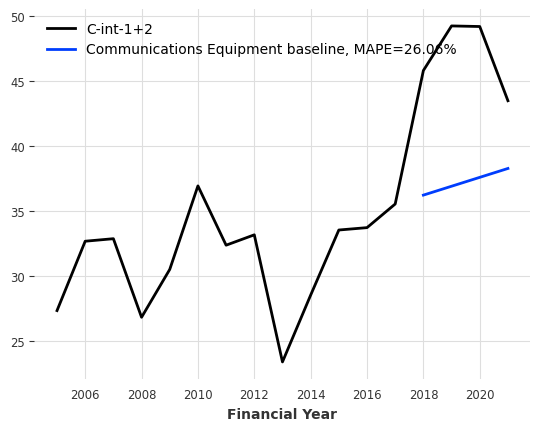

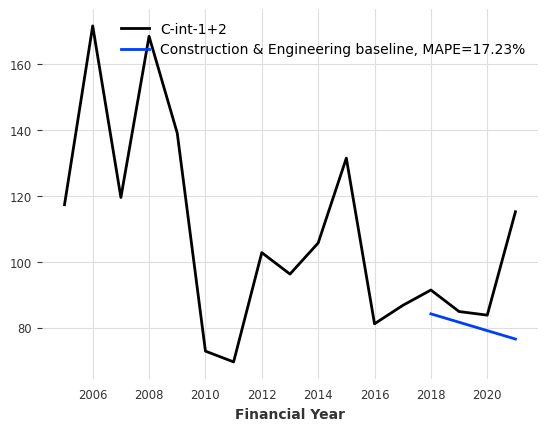

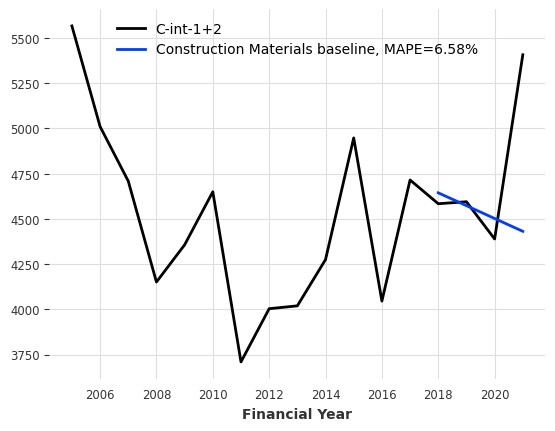

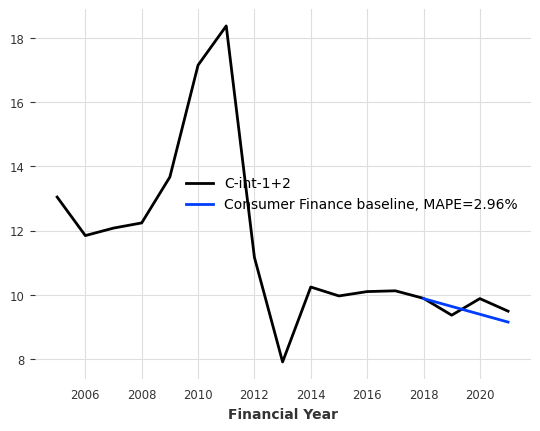

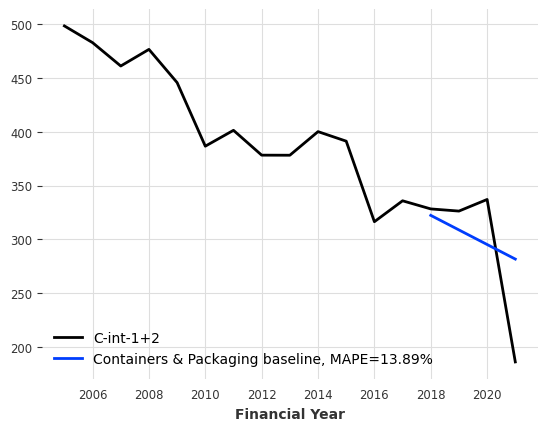

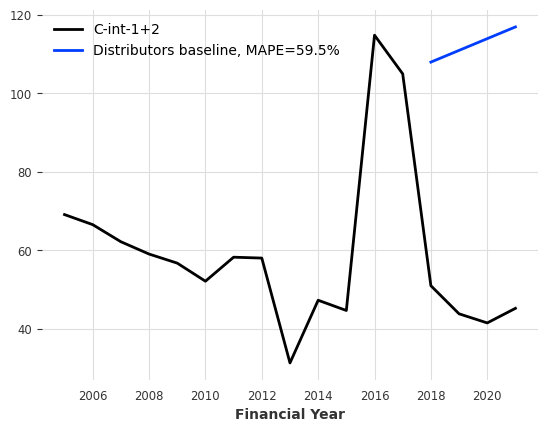

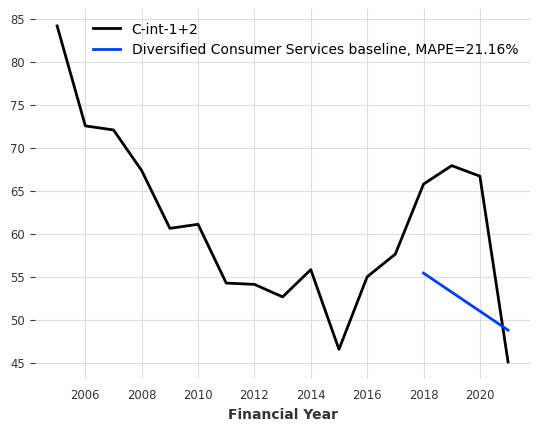

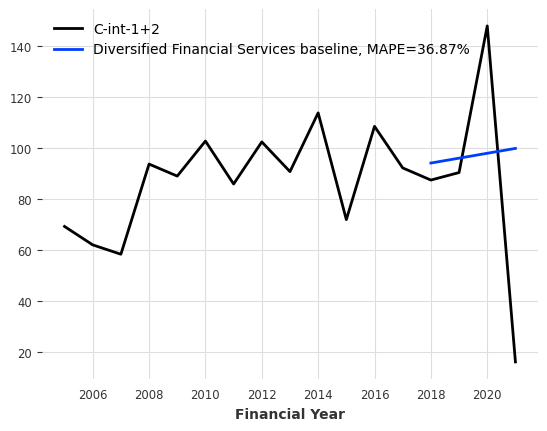

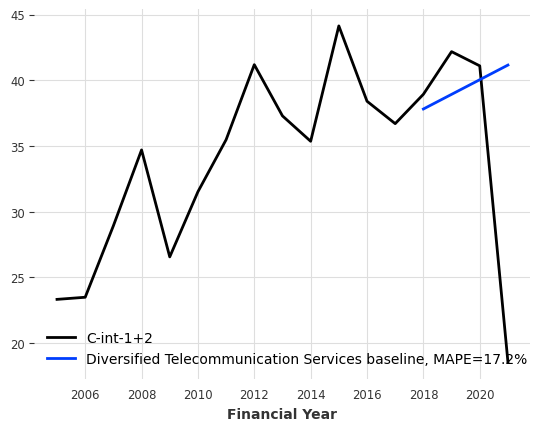

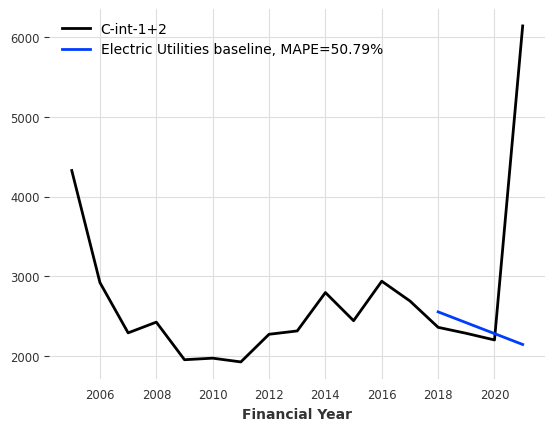

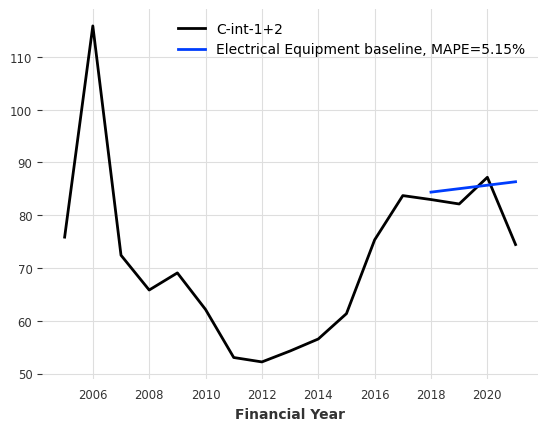

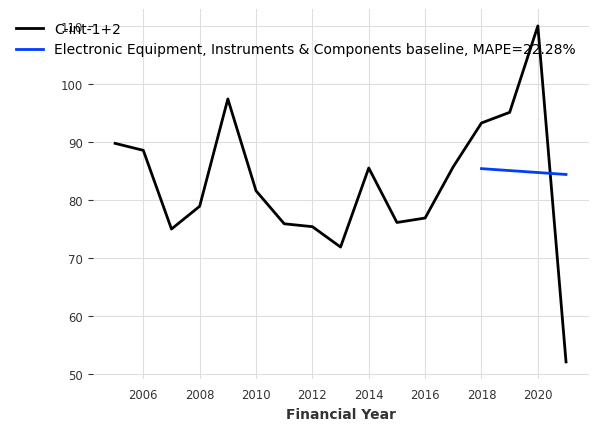

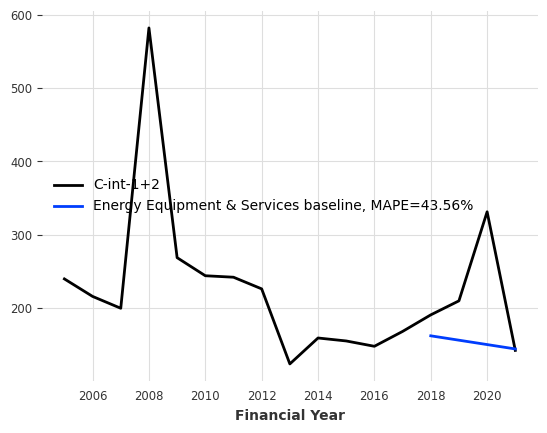

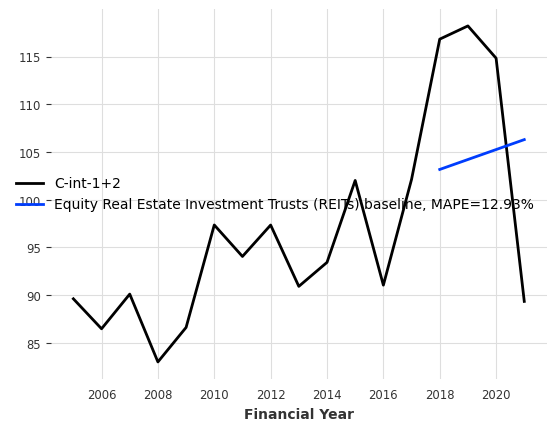

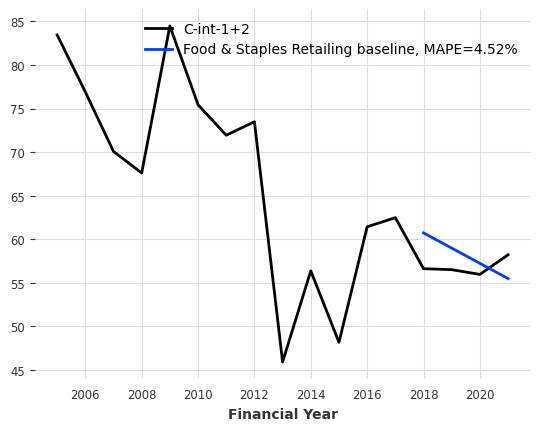

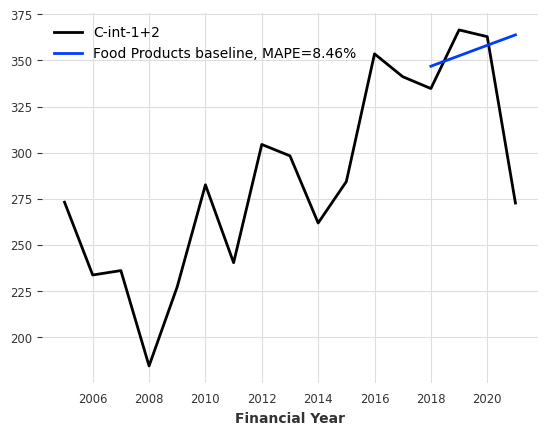

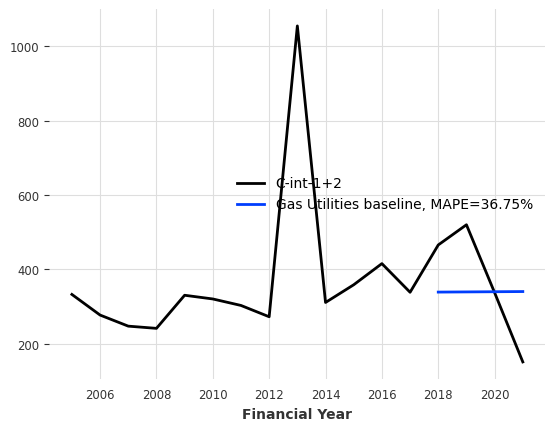

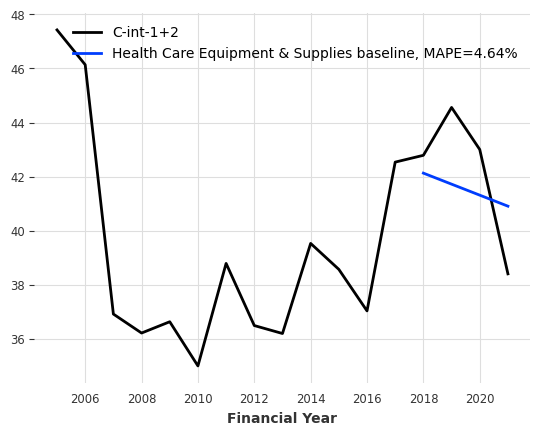

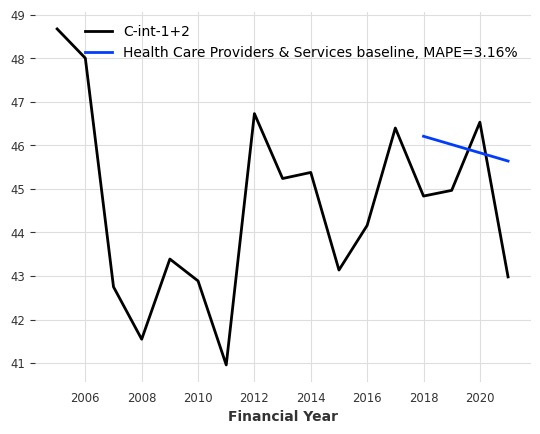

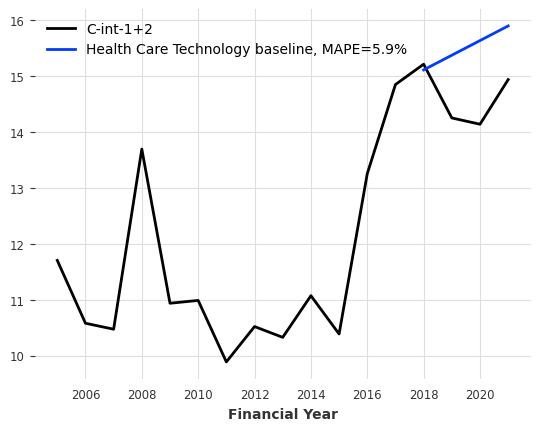

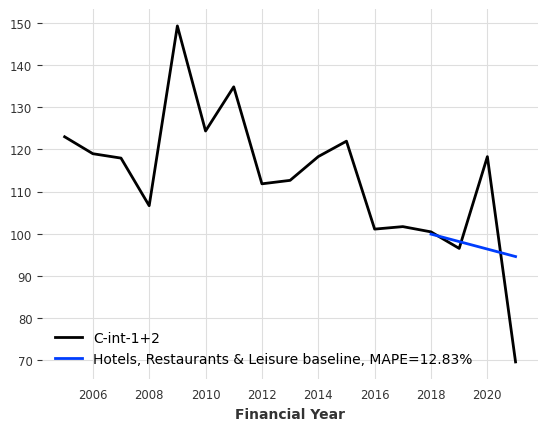

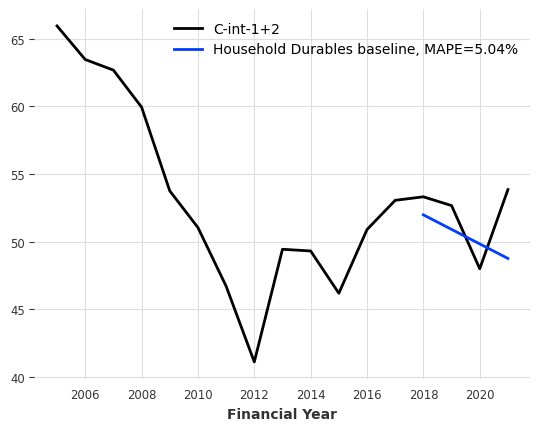

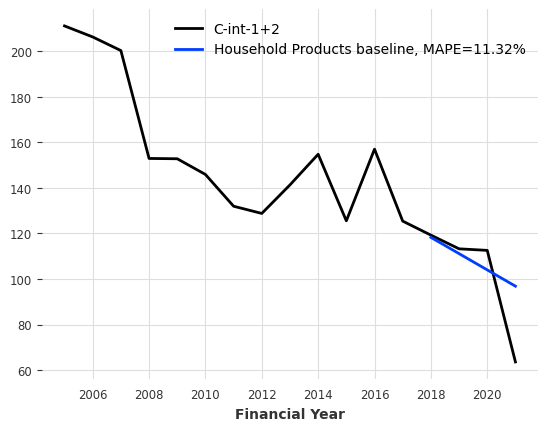

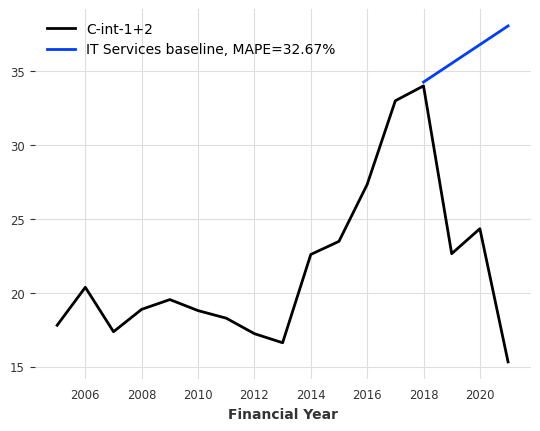

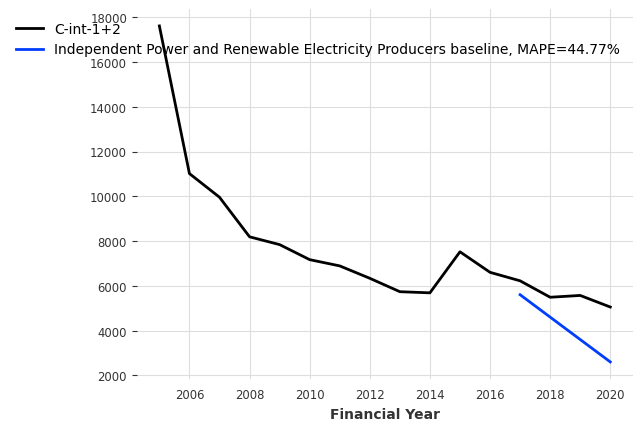

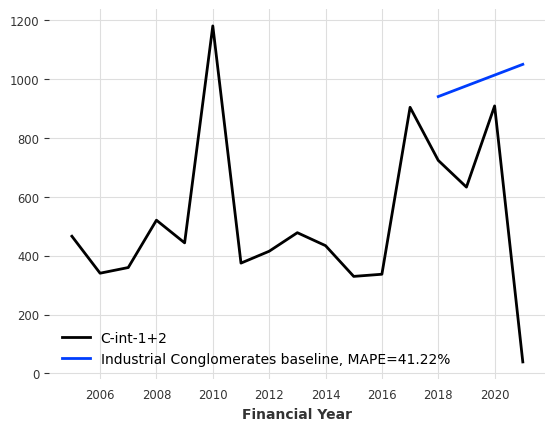

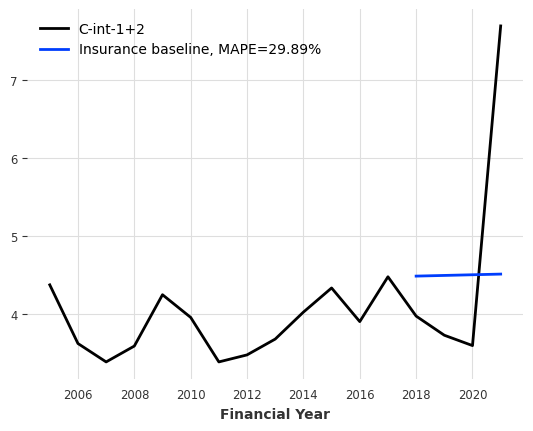

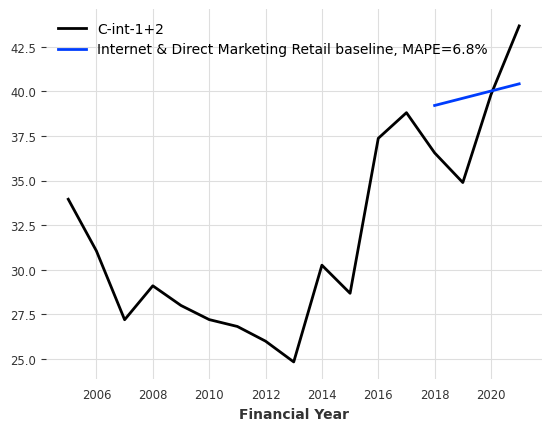

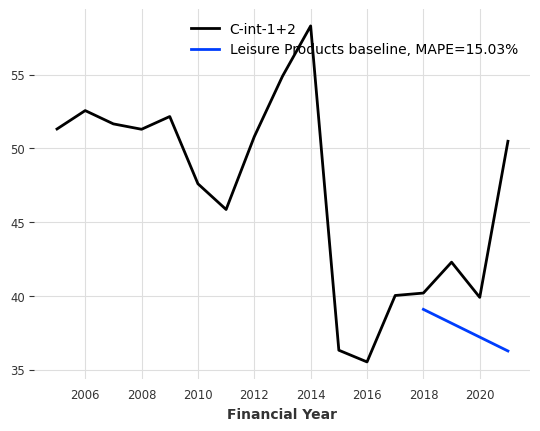

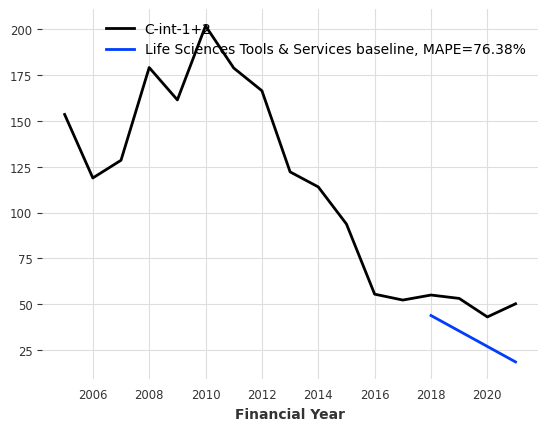

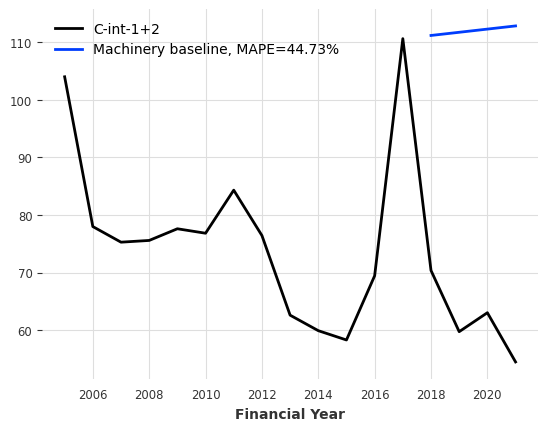

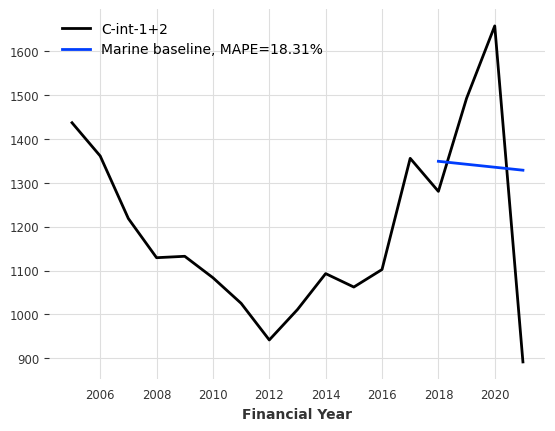

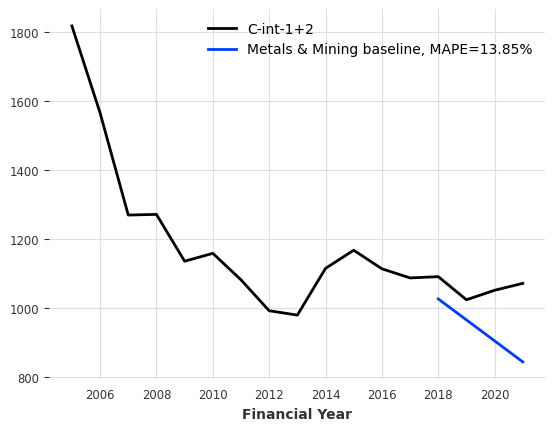

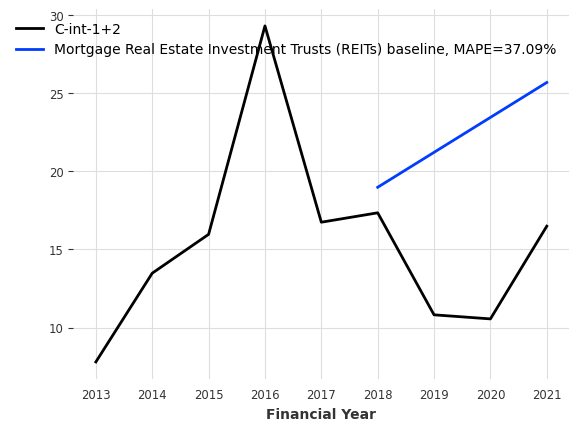

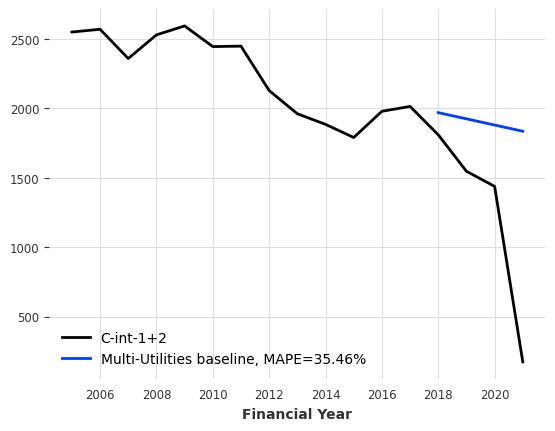

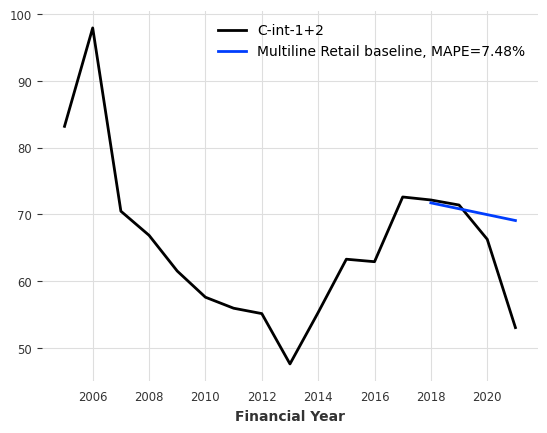

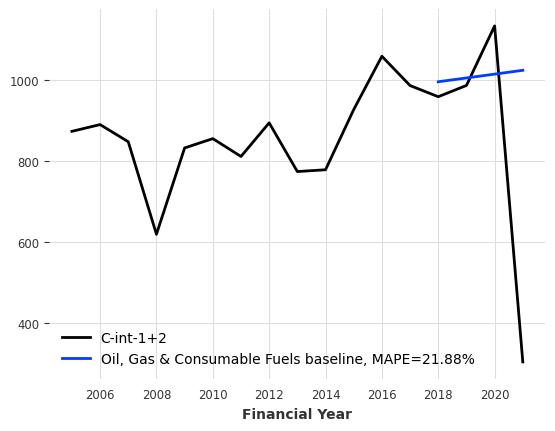

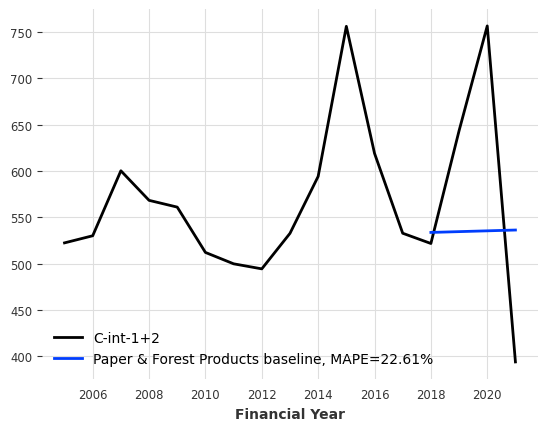

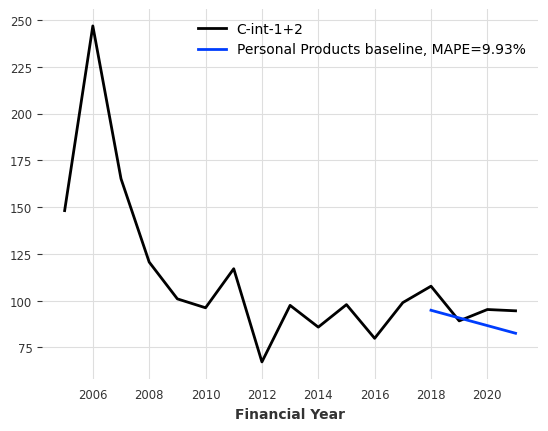

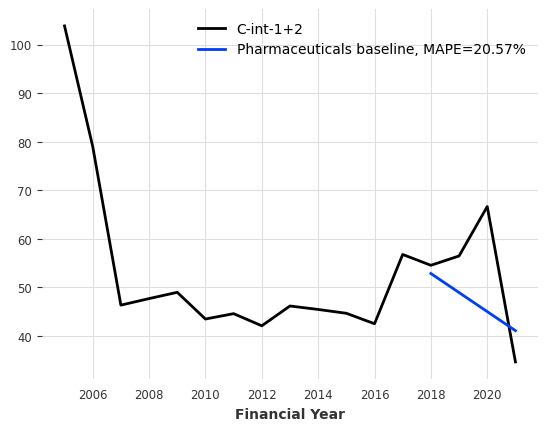

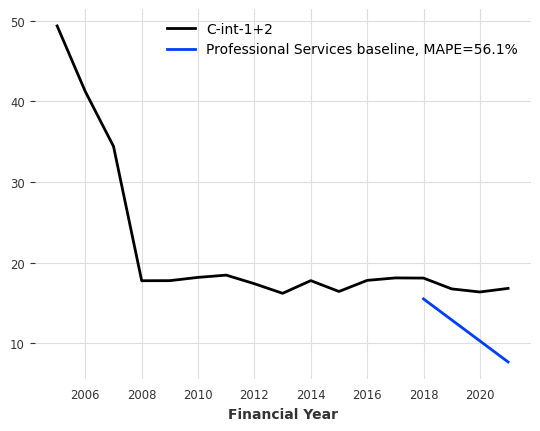

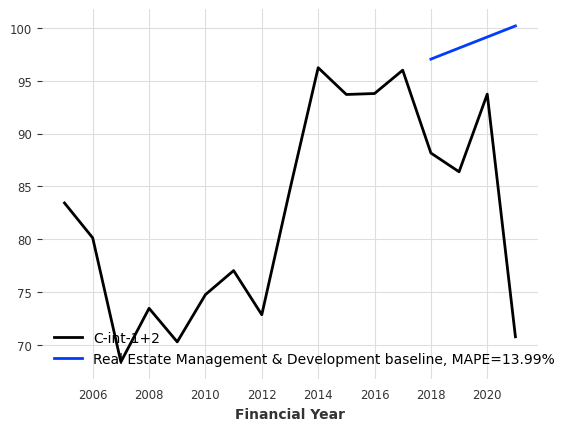

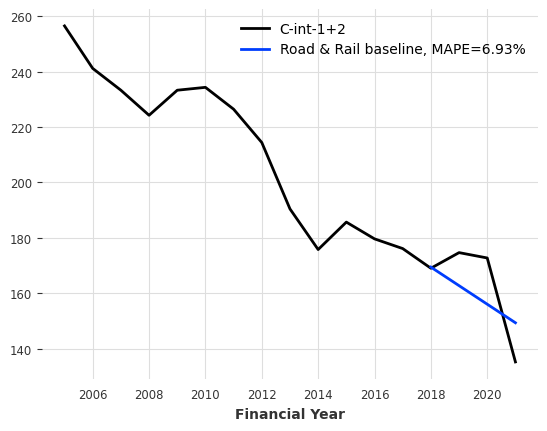

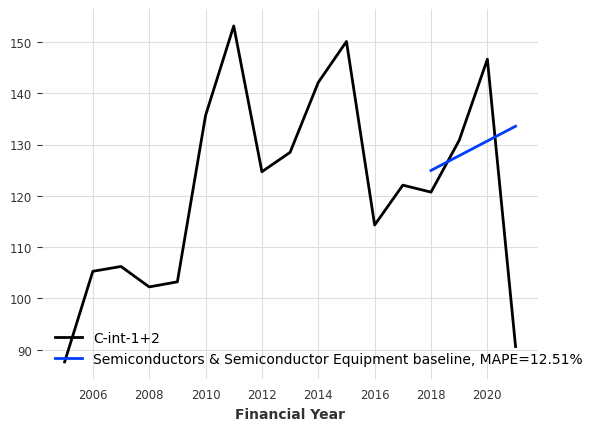

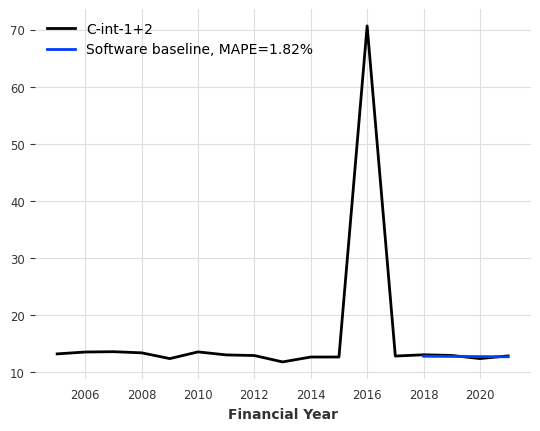

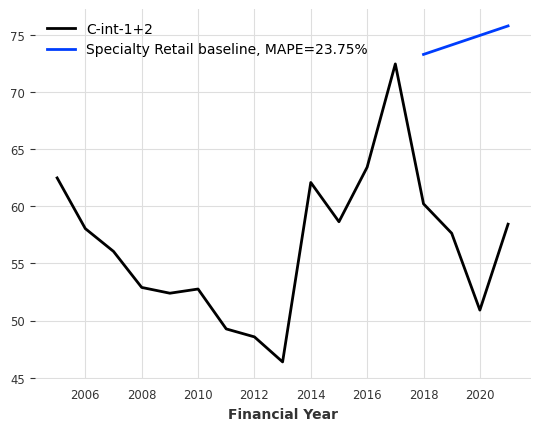

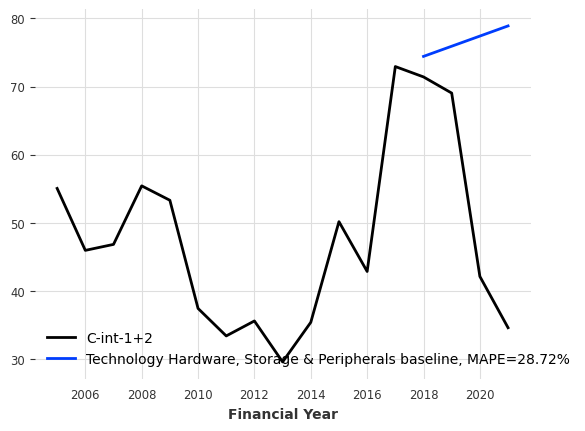

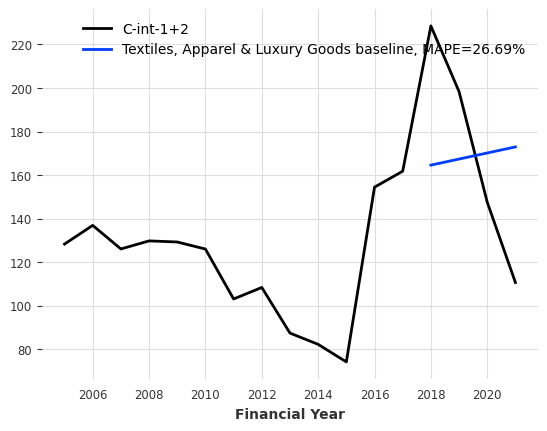

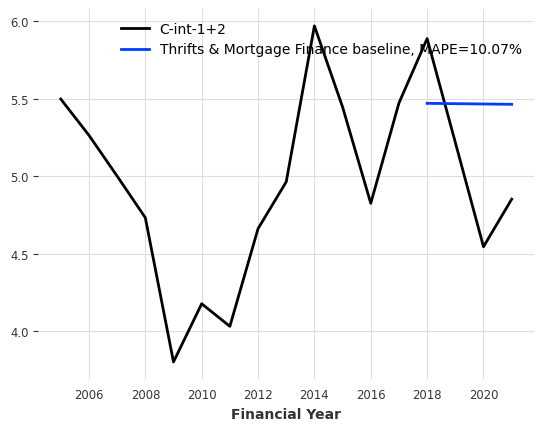

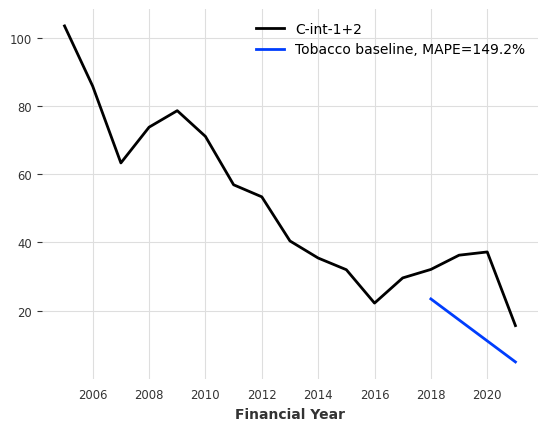

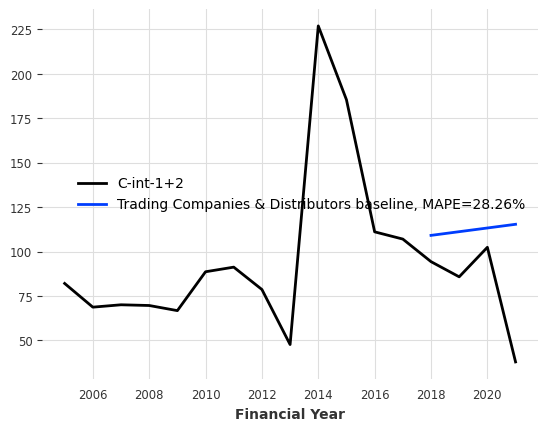

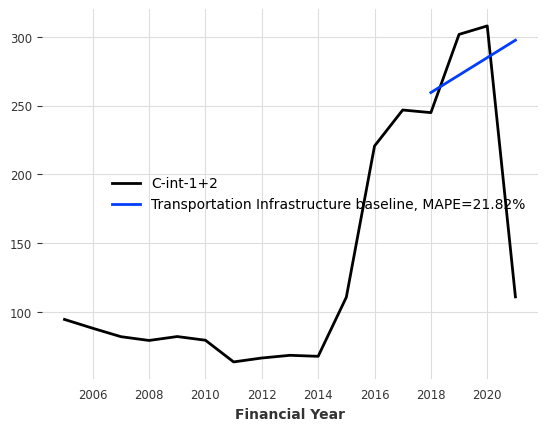

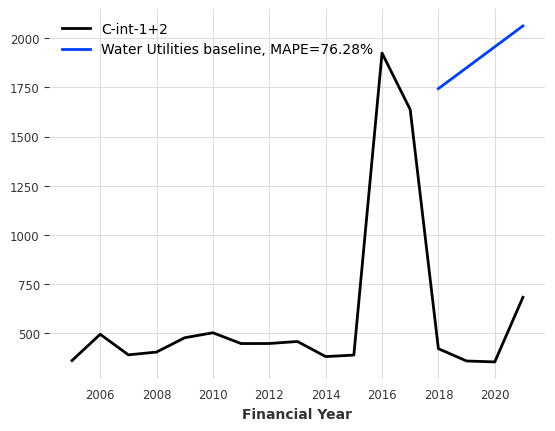

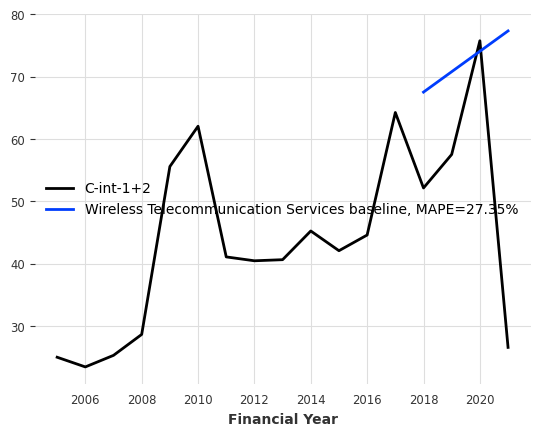

In [19]:
from darts.metrics import mape


output = {}
mape_list = {}
# plt.figure(figsize=(20,200))
# fig, ax = plt.subplots(66)
# fig.suptitle('Baseline models for 66 industries (5 left out)')

for index, industry in enumerate(ind_names_17yr):
    df = data_4y_plus[data_4y_plus["GICS Industry Name"] == industry]
    df = df.groupby("Financial Year").mean()
    df["C-int-1+2"] = df["Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)"] + df["Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)"]
    tmp = df["C-int-1+2"].reset_index()
    series = TimeSeries.from_dataframe(tmp, "Financial Year", "C-int-1+2")
    train, val = series[:-4], series[-4:]
    model = NaiveDrift()
    model.fit(train)
    pred = model.predict(len(val))
    output[industry] = pred
    err = mape(pred, series)
    mape_list[industry] = err
    series.plot(new_plot=True)
    pred.plot(label=f"{industry} baseline, MAPE={round(err,2)}%")



In [25]:
data[data["GICS Industry Name"] == "Electric Utilities"]["TCUID"].value_counts()

44130     17
56406     17
53236     16
44242     16
54864     16
          ..
186135     1
191238     1
207244     1
213001     1
247287     1
Name: TCUID, Length: 203, dtype: int64